In [4]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)

In [5]:
filename = "250317_All_Data.csv"
data = pd.read_csv(f'Figure_Data/{filename}')

In [11]:
df = pd.DataFrame(data)

# Filter data for cycle 0 and specific line_name_norep
samples_of_interest = [
    "PP_0368", "PP_0437", "PP_0528", "PP_0751","PP_0812", "PP_0813", "PP_0814",
    "PP_0815", "PP_1317", "PP_1506", "PP_2136", "PP_4120", "PP_4189",
    "PP_4191", "PP_4192", "Control"]

filtered_df = df[(df['cycle'] == 0) & (df['line_name_norep'].isin(samples_of_interest))]

# Further filter for specific replicates for PP_0812 and PP_0813
pp_0812_0813_filtered = filtered_df[
    ((filtered_df['line_name_norep'] == 'PP_0812') | (filtered_df['line_name_norep'] == 'PP_0813')) & 
    (filtered_df['Line Name'].str[-2:].isin(['R4', 'R5', 'R6']))]

# Combine the filtered data
final_filtered_df = pd.concat([
    filtered_df[~((filtered_df['line_name_norep'] == 'PP_0812') | (filtered_df['line_name_norep'] == 'PP_0813'))],
    pp_0812_0813_filtered])

# Sort the data with "Control" coming last
final_filtered_df['sort_key'] = final_filtered_df['line_name_norep'].apply(
    lambda x: 'ZZZ' if x == 'Control' else x
)
final_filtered_df = final_filtered_df.sort_values('sort_key').drop(columns='sort_key')

5.25


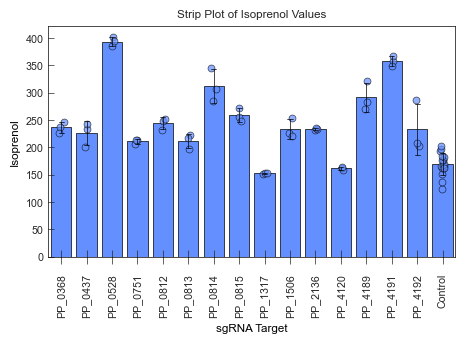

In [19]:
w = len(final_filtered_df) / 12
print(w)
plt.figure(figsize=(w, 3))

color = enmax_palette[0] 
with sns.color_palette():
    ax=sns.stripplot(
        data=final_filtered_df, x="line_name_norep", 
        y="isoprenol", 
        dodge=True, alpha=0.7, linewidth =line_size, edgecolor="0", zorder=2, color=color)

    ax=sns.barplot(
        final_filtered_df, x="line_name_norep", y="isoprenol",
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth =line_size, edgecolor="0", ax=ax,saturation=1, color=color)
    legend_handles, labels = ax.get_legend_handles_labels()

plt.title('Strip Plot of Isoprenol Values')
plt.xlabel('sgRNA Target')
plt.ylabel('Isoprenol')
plt.xticks(rotation='vertical')
plt.show()